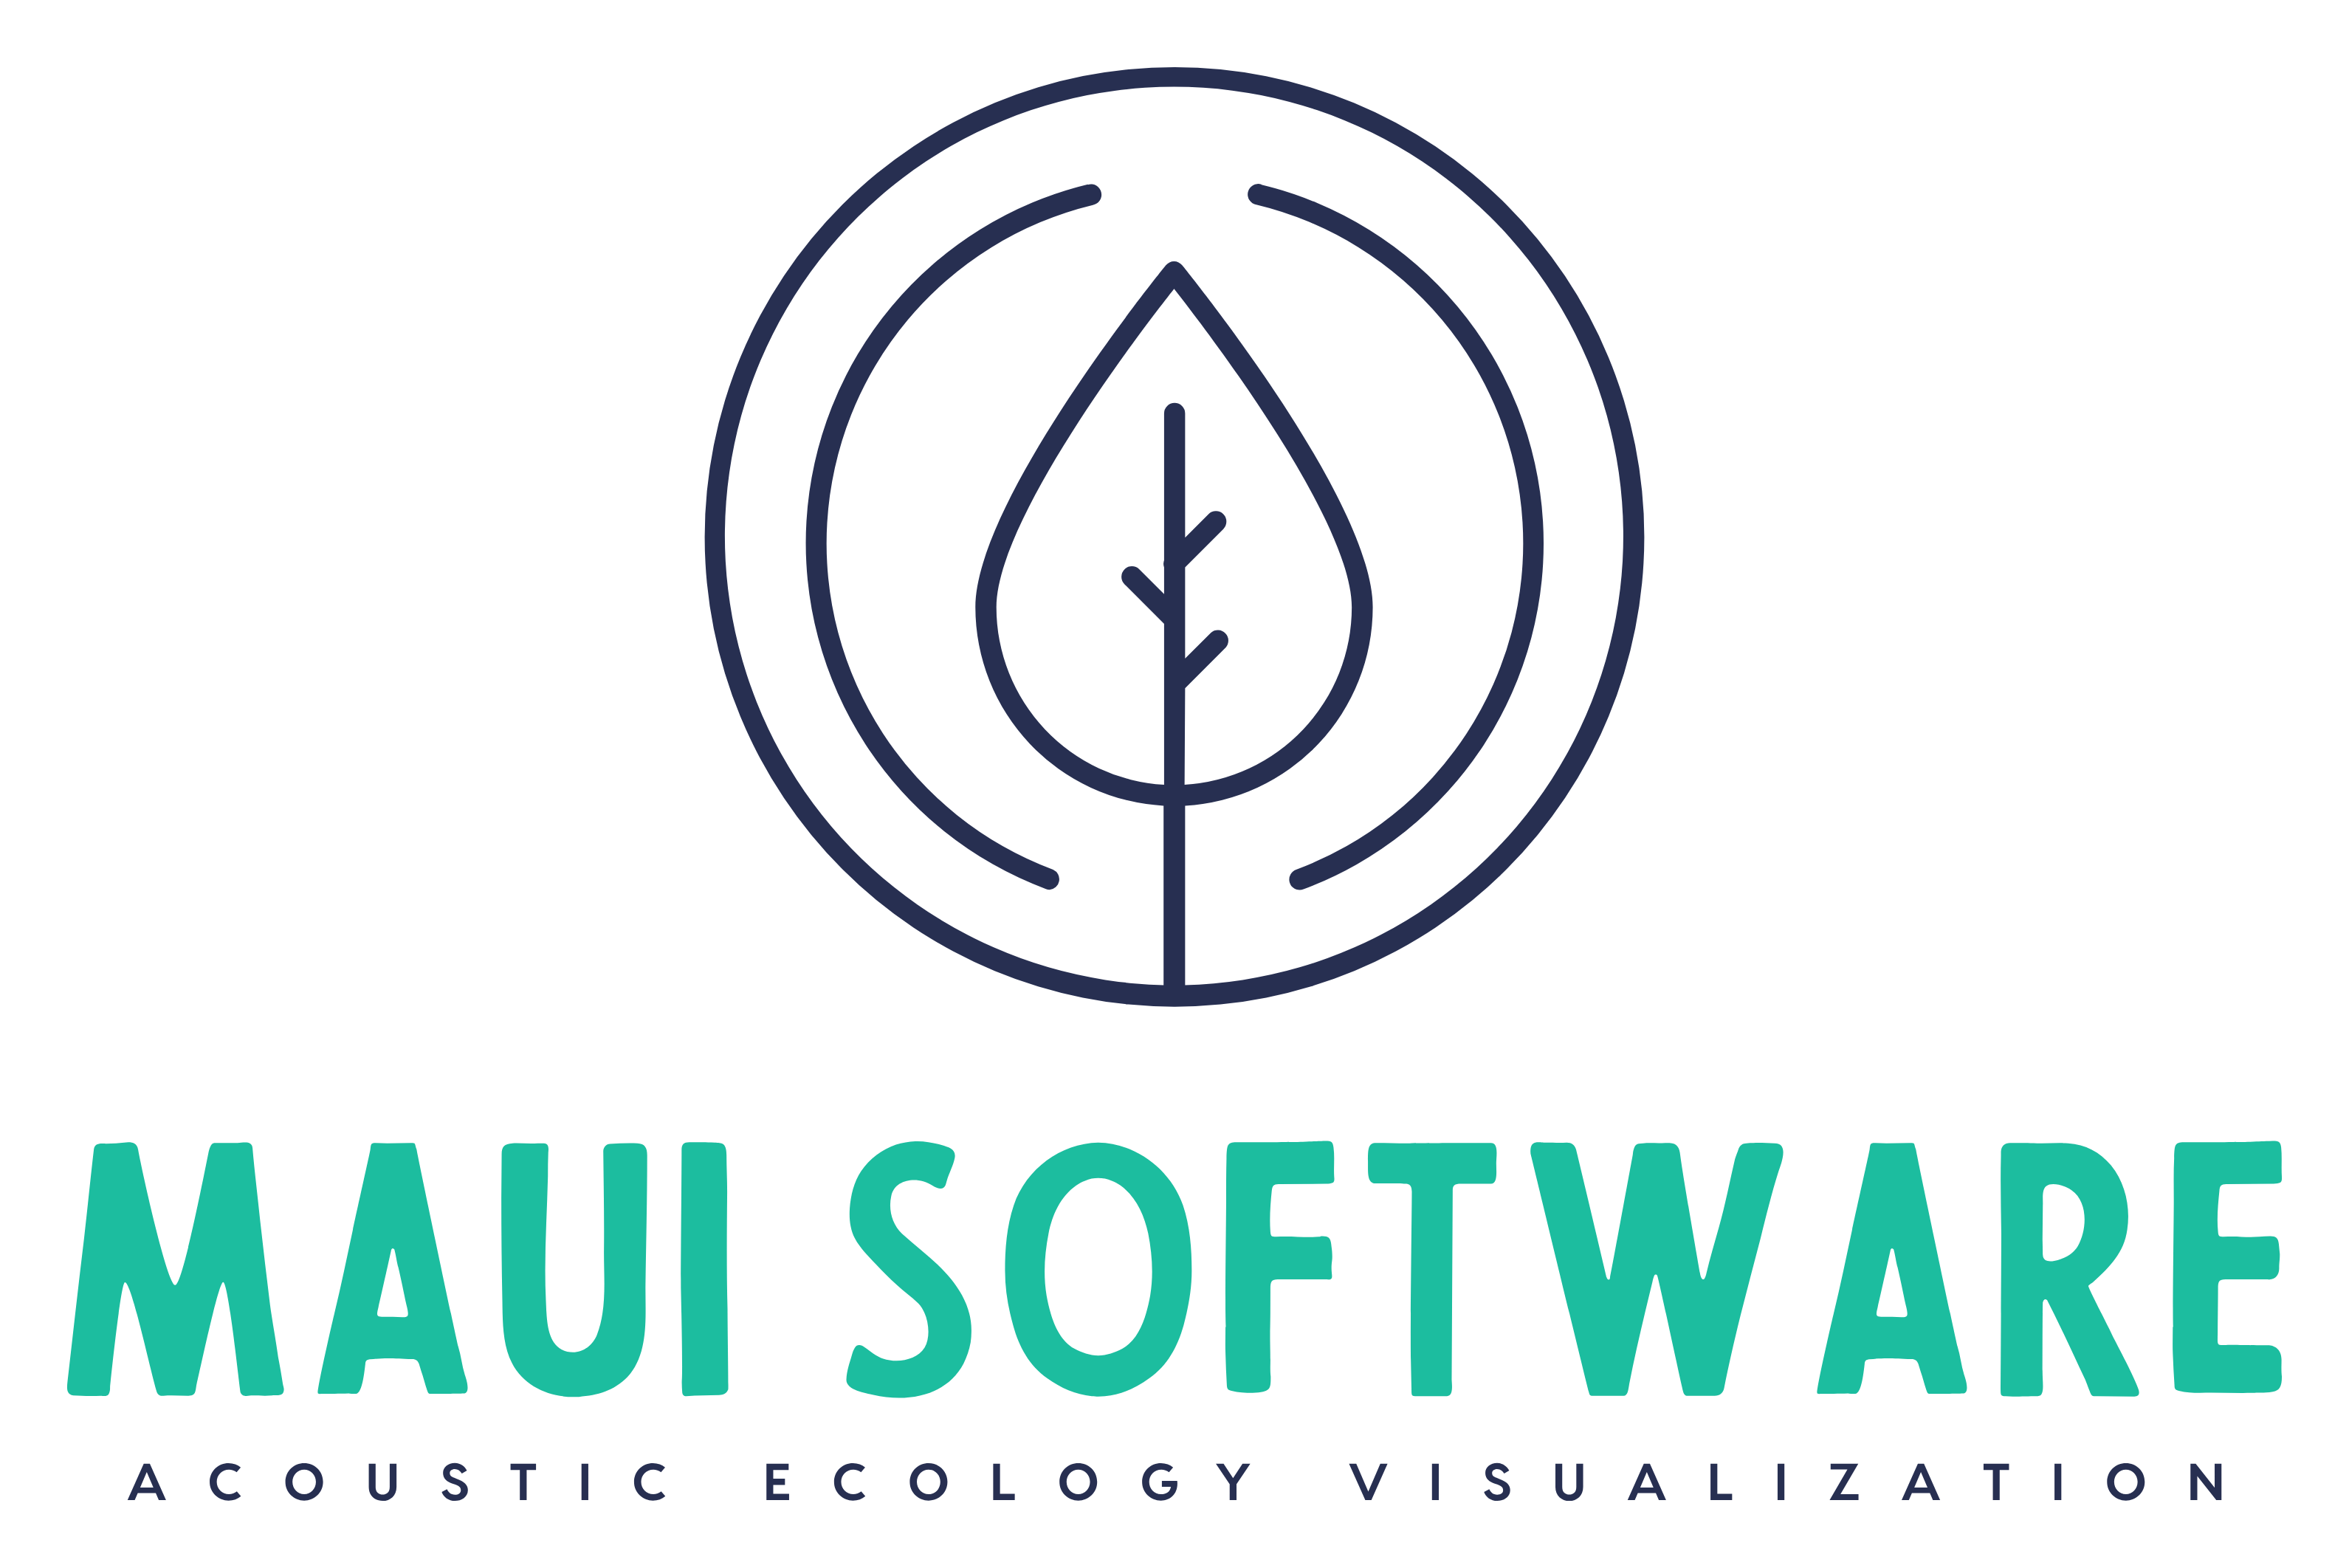

# Welcome to Maui!
## Examples series - Exploratory Data Analysis

In this example, you'll see how to perform Exploratory Data Analysis in the loaded data.

If you have any questions or encounter any issues, please let us know through the [project's GitHub discussions](https://github.com/maui-software/maui-software/discussions)!



# 1. Import Maui

## 1.1. Installation

Maui is available on PyPi and can be installed using pip with the following command. One important detail is that Maui is specifically designed for use in coding interfaces like Colab and Jupyter Lab due to its advanced visualization capabilities, leveraging the power of Plotly.



In [1]:
# !pip install maui-software

## 1.2. Import

Once installed, it's time to import!

Maui consists of several submodules that need to be imported individually. For this tutorial, we are particularly interested in utilizing the IO and EDA modules.

In [2]:
# # import numpy
# import pandas
# # import maui

# # print(f"NumPy version: {numpy.__version__}")
# print(f"pandas version: {pandas.__version__}")
# # print(f"maui version: {maui.__version__}")

In [3]:
import audioread

from maui import samples, eda

# 2. Load dataset

The initial task is to load the data. In this example we will use the samples module to extract all audios from Brazil present in Xeno-Canto dataset. Note that Maui counts on an abstraction of Xeno-Canto API, which is simple to use.

The method downloads the data and returns a dataframe with all information necessary to create visualizations over the data, such as path to the audio file, date and time of the recording and other variables present in Xeno-Canto dataset.

In [ ]:
params = {
    'cnt':'brazil'
}

df = samples.get_xc_data(q = params, extract_path="./xc_data")


In [5]:
unhashable_columns = df.columns[df.map(lambda x: isinstance(x, (list, dict))).any()]
df = df.drop(columns=unhashable_columns) # removing dictionary columns

df.rename(columns={'local_file_path': 'file_path', 'date': 'dt'}, inplace=True)

In [6]:
# Add to dataframe a column unforming the audios duration (in seconds)

# Define a function to calculate duration
def get_duration(file_path):
    with audioread.audio_open(file_path) as audio_file:
        return audio_file.duration


# Apply the function to the DataFrame
df['duration'] = df['file_path'].apply(get_duration)

In [7]:
df.nunique(axis=0)

id                 500
gen                 58
sp                 118
ssp                 12
group                4
en                  76
rec                 72
cnt                  1
loc                217
lat                229
lng                228
alt                 81
type                47
sex                  5
stage                6
method               4
url                500
file               500
file-name          500
lic                  4
q                    5
length             159
time               306
dt                 302
uploaded           186
rmk                317
bird-seen            3
animal-seen          3
playback-used        3
temp                13
regnr                1
auto                 3
dvc                 26
mic                 22
smp                  5
file_path          500
file_downloaded      1
duration           445
dtype: int64

# 3. Exploratory data analysis
Once the data is loaded, we can conduct exploratory data analysis (EDA). This section aims to illustrate the usage of the methods in the EDA module.

## 3.1. Card Summary

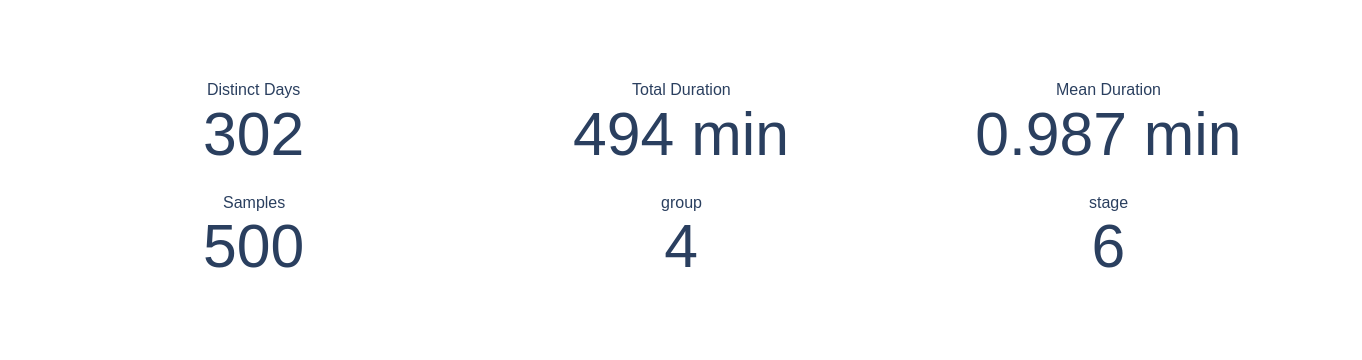

In [14]:
categories = ['group', 'stage']
card_dict, fig = eda.card_summary(df, categories)

## 3.2. Daily Distribution Analysis

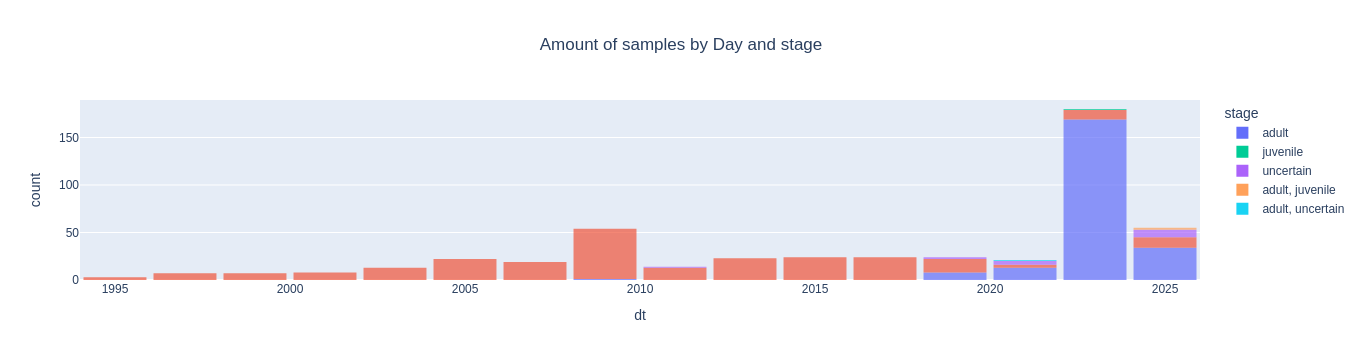

In [15]:
fig = eda.daily_distribution_analysis(df, 'dt', 'stage')

## 3.3. Duration Analysis

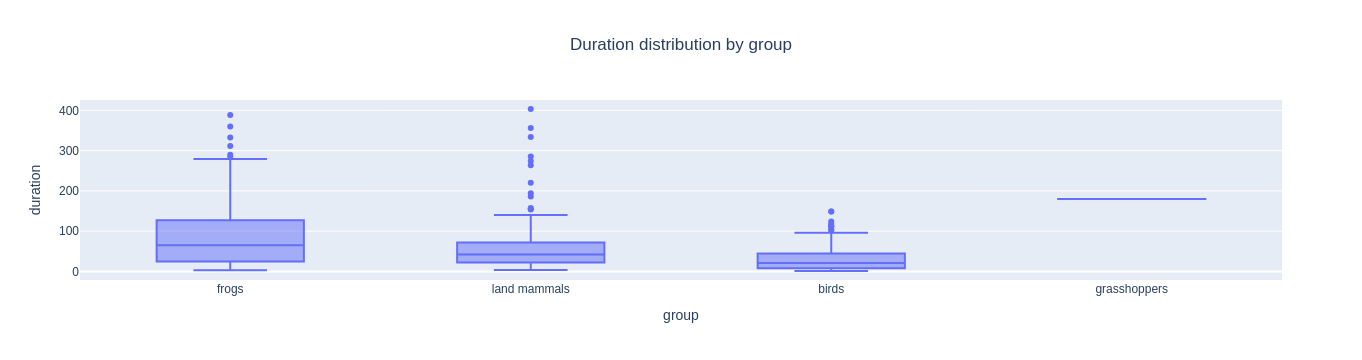

In [16]:
fig = eda.duration_analysis(df, 'group', 'duration')

## 3.4. Duration Distribution

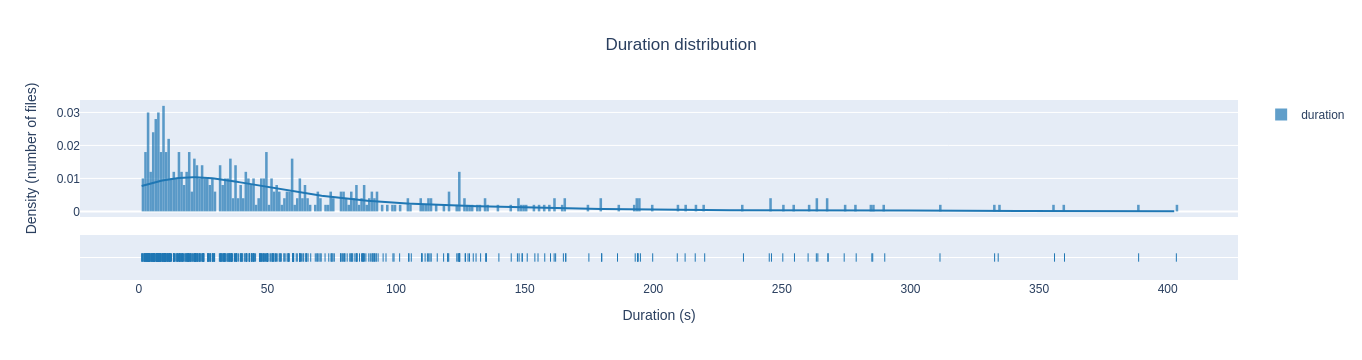

In [17]:
fig = eda.duration_distribution(df)

## 3.5. Heatmap Analysis

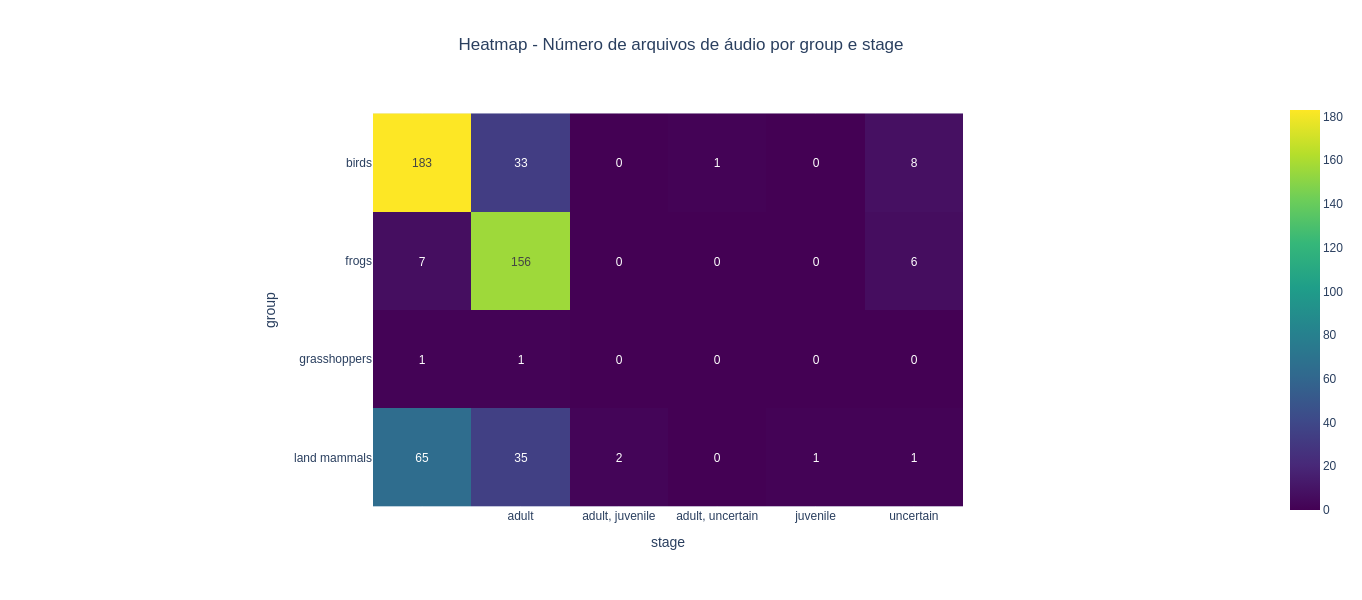

In [18]:
df_group, fig = eda.heatmap_analysis(df, 'group', 'stage')

## 3.6. Histogram Analysis

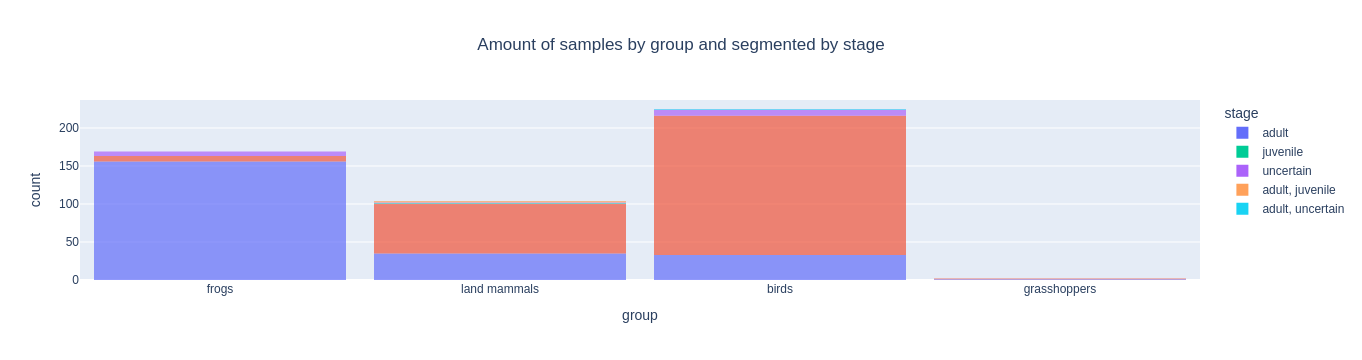

In [19]:
fig = eda.histogram_analysis(df, 'group', 'stage')